In [2]:
from solweig_gpu import thermal_comfort

In [3]:
thermal_comfort(
    base_path='Downloads/SOLWEIG-GPU 2/Input_rasters/',
    selected_date_str='2020-08-13',
    building_dsm_filename='Building_DSM.tif',
    dem_filename='DEM.tif',
    trees_filename='Trees.tif',
    landcover_filename='Landcover.tif',
    tile_size=1000,
    overlap=100,
    use_own_met=False,
    start_time='2020-08-13 06:00:00',
    end_time='2020-08-14 05:00:00',
    data_source_type='wrfout',
    data_folder='Downloads/SOLWEIG-GPU 2/Forcing_data/WRFOUT/',
)

Creating tiles for Building_DSM...
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_0.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_1000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_2000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_0_3000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_0.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_1000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_2000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_1000_3000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_2000_0.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/Building_DSM_2000_1000.tif
Created tile: Downloads/SOLWEIG-GPU 2/Input_rasters/Building_DSM/B

Computing Wall Height and Aspect: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [01:40<00:00,  6.27s/it]


Running Solweig ...
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezone: America/Chicago, UTC offset: -5.0 hours
Time taken to execute tile 0_0: 490.13 seconds
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezone: America/Chicago, UTC offset: -5.0 hours
Time taken to execute tile 0_1000: 484.57 seconds
Attention! The land cover grid includes values (deciduous and/or conifer) not appropriate for the SOLWEIG-formatted land cover grid (should not include 3 or 4). Land cover under the vegetation is required. Setting the invalid landcover types to grass.
[INFO] Timezo

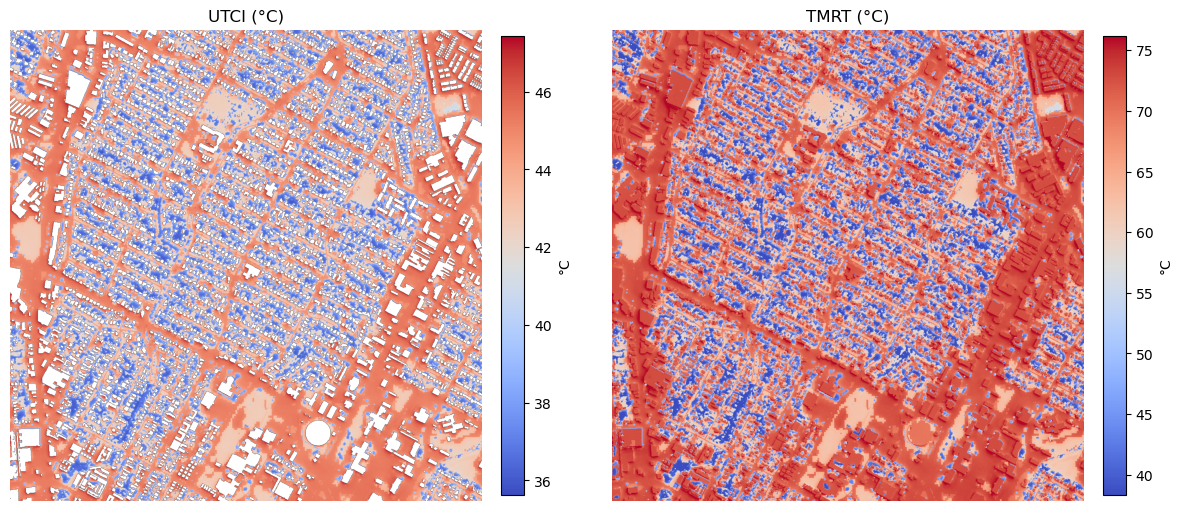

In [7]:
import rasterio
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import TwoSlopeNorm

# ---- paths ----
utci_path = "Downloads/SOLWEIG-GPU 2/Input_rasters/Outputs/1000_1000/UTCI_1000_1000.tif"
tmrt_path = "Downloads/SOLWEIG-GPU 2/Input_rasters/Outputs/1000_1000/TMRT_1000_1000.tif"

def read_band(path):
    with rasterio.open(path) as src:
        arr = src.read(15).astype(float) # raster correponding to 3pm (15H) 
        # mask NoData
        if src.nodata is not None:
            arr = np.where(arr == src.nodata, np.nan, arr)
        bounds = src.bounds
        extent = (bounds.left, bounds.right, bounds.bottom, bounds.top)
    return arr, extent

# read both rasters
utci, utci_extent = read_band(utci_path)
tmrt, tmrt_extent = read_band(tmrt_path)

utci_cmap = "coolwarm"
tmrt_cmap = "coolwarm"

# ---- plot ----
fig, axes = plt.subplots(1, 2, figsize=(12, 5), constrained_layout=True)

im0 = axes[0].imshow(utci, extent=utci_extent, origin="upper",
                     cmap=utci_cmap)
axes[0].set_title("UTCI (°C)")
axes[0].axis("off")
cbar0 = fig.colorbar(im0, ax=axes[0], fraction=0.046, pad=0.04)
cbar0.set_label("°C")

im1 = axes[1].imshow(tmrt, extent=tmrt_extent, origin="upper",
                     cmap=tmrt_cmap, vmin=tmrt_vmin, vmax=tmrt_vmax)
axes[1].set_title("TMRT (°C)")
axes[1].axis("off")
cbar1 = fig.colorbar(im1, ax=axes[1], fraction=0.046, pad=0.04)
cbar1.set_label("°C")

plt.show()
